In [1]:
#Assignment-2

In [2]:
#Import the Python Packages.
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Using pandas to read the .txt file.
data = pd.read_csv('DecayTimecourse.txt', delimiter=',')
# Convert the .txt file to .csv file and we will start working with this .csv file.
data.to_csv('DecayTimecourse.csv', index=False)
# Using pandas read the .csv file.
data = pd.read_csv ('DecayTimecourse.csv', delimiter= '\t')

In [4]:
data #Print the data.

,Time course #,timecourse1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 18,timecourse3,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,YORF,0.0,5.000000,10.000000,15.000000,20.000000,30.000000,40.000000,50.000000,60.000000,...,60.000000,0.0,5.000000,10.000000,15.000000,20.000000,30.000000,40.000000,50.000000,60.000000
1,YAL026C,1.0,0.703032,NaN,NaN,NaN,0.713088,0.332218,0.215325,0.226495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YDR148C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.374799,1.0,0.968435,NaN,0.551961,0.430054,0.483829,0.398754,0.223900,0.246680
3,YIL125W,1.0,1.176639,0.823170,0.556528,NaN,0.712678,0.427962,0.320204,0.276578,...,NaN,1.0,0.830889,0.577928,0.812495,0.591393,0.564740,0.450448,0.494973,0.374799
4,YLR240W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.930606,NaN,0.637943,NaN,0.610046,0.340338,0.260625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6180,YHR217C,1.0,NaN,NaN,NaN,NaN,1.086471,-0.683673,0.853815,0.131799,...,0.621047,1.0,0.720896,0.217361,0.372403,-0.245485,-1.210194,0.255268,-1.275420,NaN
6181,YPR202W,1.0,-1.614135,-1.987968,-1.572060,-2.140755,NaN,-2.624831,NaN,-2.929300,...,-2.435356,1.0,-1.062584,-1.766918,-1.066211,-1.900540,-1.659776,-2.599347,-3.163888,-2.765729
6182,YFL063W,1.0,0.709353,NaN,NaN,0.384163,-0.003912,-1.611686,NaN,-1.417343,...,NaN,1.0,NaN,-1.107214,-0.985987,-1.409186,-1.515253,-2.073723,-2.828369,NaN
6183,YDR543C,1.0,0.384179,-11.808840,-12.892562,NaN,-88.868870,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

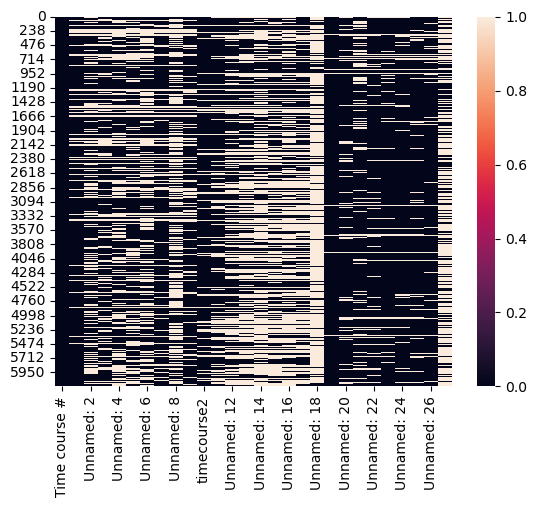

In [5]:
sns.heatmap(data.isnull()) # draw the heatmap to check the number of NaN values present in the dataset
# Now these NaN values need be handled.

In [6]:
from scipy.optimize import curve_fit # importing curve_fit for data fitting.

# The Function to model exponential decay.
def exp_decay(time, initial, rate):
    return initial * np.exp(-rate * time)

# The Function to calculate half-life from decay rate.
def calculate_half_life(rate):
    return np.log(2) / rate

# Function to process each time course and calculate half-lives
def process_time_course(data, start_col, end_col):
    half_lives = []
    time_points = data.iloc[0, start_col:end_col+1].values  # Extract time points from the first row
    for i in range(1, len(data)):
        y_values = data.iloc[i, start_col:end_col+1].dropna().values  # Extract and clean measurements for each gene
        if len(y_values) < 2:  # Skip if not enough data points present in the dataset.
            half_lives.append(np.nan)
            continue
        try:
            # Fit exponential decay model
            popt, _ = curve_fit(exp_decay, time_points[:len(y_values)], y_values, maxfev=10000)
            rate = popt[1]  # Extract decay rate
            half_life = calculate_half_life(rate)
            half_lives.append(half_life)
        except:
            half_lives.append(np.nan)  # Append NaN in case of failure to fit the model
    return half_lives

# Calculate half-lives for each time course.
time_course_1_half_lives = process_time_course(data, 1, 9)  # Columns for timecourse1, The time course_1 from Unnamed: 1 to Unnamed :9
time_course_2_half_lives = process_time_course(data, 10, 18)  # Columns for timecourse2, The time course_2 from Unnamed: 10 to Unnamed :18 
time_course_3_half_lives = process_time_course(data, 19, 27)  # Columns for timecourse3, The time course_3 from Unnamed: 19 to Unnamed :27

# Combine results into a DataFrame
half_life_results = pd.DataFrame({
    'YORF': data['Time course #'][1:],  # Exclude the first row which contains time points
    'Half-life Time Course 1': time_course_1_half_lives,
    'Half-life Time Course 2': time_course_2_half_lives,
    'Half-life Time Course 3': time_course_3_half_lives
})

half_life_results.head(10) # Print the first 10 results of the Half-life Time Courses of 1,2 and 3.

/var/folders/yx/fwkx571n6174r10h_lyq14m00000gn/T/ipykernel_78298/3229564596.py:5: RuntimeWarning: overflow encountered in exp
  return initial * np.exp(-rate * time)
/Users/prasanthkumar/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,YORF,Half-life Time Course 1,Half-life Time Course 2,Half-life Time Course 3
1,YAL026C,11.578468,33.951613,NaN
2,YDR148C,NaN,45.559398,18.732603
3,YIL125W,23.425139,42.802346,45.559398
4,YLR240W,NaN,38.597420,15.232096
5,YCL009C,14.783252,40.793253,36.753902
6,YMR108W,23.513696,34.684913,26.864111
7,YNR044W,NaN,54.689582,13.000786
8,YGL032C,10.204052,NaN,27.218011
9,YMR261C,22.635922,179.056180,63.941386
10,YBR126C,18.322975,-142.132383,34.844624


In [7]:
# Calculate the average half-life for each gene, excluding NaN values
half_life_results['Final Half-life'] = half_life_results[
    ['Half-life Time Course 1', 'Half-life Time Course 2', 'Half-life Time Course 3']
].mean(axis=1, skipna=True)

# Display the updated DataFrame with the final half-lives
half_life_results
# The Final half-lifes that is average of the three half-lifes doesnt contain any NaN values.
# Saving the half_life_results.
half_life_results.to_csv('half_life_results.csv', index=False)

In [8]:
half_life_results = pd.read_csv('half_life_results.csv')

In [9]:
half_life_results # This will show the results of Half-life of all three time courses and Final Half-Life which is the average half-life of the three time courses.

,YORF,Half-life Time Course 1,Half-life Time Course 2,Half-life Time Course 3,Final Half-life
0,YAL026C,11.578468,33.951613,NaN,22.765040
1,YDR148C,NaN,45.559398,18.732603,32.146001
2,YIL125W,23.425139,42.802346,45.559398,37.262294
3,YLR240W,NaN,38.597420,15.232096,26.914758
4,YCL009C,14.783252,40.793253,36.753902,30.776802
...,...,...,...,...,...
6179,YHR217C,5.898066,2.237831,4.770266,4.302054
6180,YPR202W,0.013889,0.016570,0.020725,0.017061
6181,YFL063W,3.596668,2.973721,0.020115,2.196835
6182,YDR543C,0.826149,2.058899,NaN,1.442524


In [10]:
# Exclude genes with NaN final half-lives
valid_half_lives = half_life_results.dropna(subset=['Final Half-life'])

# Calculate the 90th and 10th percentiles
high_threshold = valid_half_lives['Final Half-life'].quantile(0.9)
low_threshold = valid_half_lives['Final Half-life'].quantile(0.1)

# Filter genes with very high and very low half-lives
very_high_half_lives = valid_half_lives[valid_half_lives['Final Half-life'] >= high_threshold]
very_low_half_lives = valid_half_lives[valid_half_lives['Final Half-life'] <= low_threshold]


In [11]:
very_low_half_lives.to_csv('very_low_half_lives.csv', index=False) # Saving the Low_Half_lives into a .csv file

In [12]:
lower_10_percent= pd.read_csv('very_low_half_lives.csv')# Load the .csv file 

In [13]:
lower_10_percent # These are the genes that are in lower 10_percent.

,YORF,Half-life Time Course 1,Half-life Time Course 2,Half-life Time Course 3,Final Half-life
0,YBR126C,18.322975,-142.132383,34.844624,-29.654928
1,YDR074W,33.378881,-19.006918,-102.684701,-29.437579
2,YML100W,NaN,-591.449089,30.035786,-280.706652
3,YNL172W,5.625471,4.565039,8.854300,6.348270
4,YLR127C,NaN,10.622352,5.527588,8.074970
...,...,...,...,...,...
612,YHR217C,5.898066,2.237831,4.770266,4.302054
613,YPR202W,0.013889,0.016570,0.020725,0.017061
614,YFL063W,3.596668,2.973721,0.020115,2.196835
615,YDR543C,0.826149,2.058899,NaN,1.442524


In [14]:
very_high_half_lives.to_csv('very_high_half_lives.csv', index=False) # Saiving the Very_High_lives to a .csv file.

In [15]:
top_10_percent = pd.read_csv('very_high_half_lives.csv') # Load the .csv file.

In [16]:
top_10_percent # These are the top _10_percent 

,YORF,Half-life Time Course 1,Half-life Time Course 2,Half-life Time Course 3,Final Half-life
0,YMR261C,22.635922,179.056180,63.941386,88.544496
1,YDR118W,NaN,116.439406,12.362833,64.401120
2,YOR303W,52.548889,50.006858,68.163805,56.906517
3,YGR088W,169.449370,NaN,NaN,169.449370
4,YLR166C,17.242947,98.492778,29.704385,48.480036
...,...,...,...,...,...
612,YPL275W,30.957274,64.081139,52.340488,49.126300
613,YGL138C,258.572937,9.056663,50.187860,105.939153
614,Q0115,34.995955,121.354614,44.034365,66.794978
615,YIR027C,1.478699,18.259860,242.529806,87.422788
